In [4]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt

sqrt = np.sqrt
pi = np.pi
cos = np.cos
sin = np.sin
exp = np.exp
e = np.e

#### Резонансная частота

$\nu_0 = \dfrac{1}{2\pi\sqrt{LC}}$

In [88]:
def nu_rez(L, C):
    return 1 / (2 * np.pi * np.sqrt(L * C))

In [89]:
nu0 = nu_rez(100e-3, 0.1e-6)
nu0

1591.5494309189535

## R = 0 Ом

freq = 1588 Hz

period = 35.322 ms

N = 30 cycles

#### Логарифмический декремент затухания для возрастающего участка

$\Theta = \dfrac1n \ln{\dfrac{U_0 - U_k}{U_0 - U_{k+n}}}$

In [535]:
def Theta_incr(U0, U1, U2, n):
    return 1/n * np.log((U0 - U1) / (U0 - U2))

In [536]:
df = pd.read_csv(r'raw-data/zug-incr_0-Ohm.csv')

In [537]:
U0 = df['U0[mV]']
U1 = df['U1[mV]']
U2 = df['U2[mV]']
n  = df['n']

In [538]:
Theta_0_up = np.mean(Theta_incr(U0, U1, U2, n))

#### Логарифмический декремент затухания для затухающего участка

$\Theta = \dfrac1n \ln{\dfrac{U_m}{U_{m+n}}}$

In [539]:
def Theta_decr(U1, U2, n):
    return 1/n * np.log((U1) / (U2))

In [540]:
df = pd.read_csv(r'raw-data/zug-decr_0-Ohm.csv')

In [541]:
U1 = df['U1[mV]']
U2 = df['U2[mV]']
n  = df['n']

In [542]:
Theta_0_down = np.mean(Theta_decr(U1, U2, n))

## R = 100 Ом

freq = 1588 Hz

period = 12 ms

N = 8 cycles

#### Логарифмический декремент затухания для возрастающего участка

In [543]:
df = pd.read_csv(r'raw-data/zug-incr_100-Ohm.csv')

In [544]:
U0 = df['U0[mV]']
U1 = df['U1[mV]']
U2 = df['U2[mV]']
n  = df['n']

In [545]:
Theta_100_up = np.mean(Theta_incr(U0, U1, U2, n))

#### Логарифмический декремент затухания для затухающего участка

In [546]:
df = pd.read_csv(r'raw-data/zug-decr_100-Ohm.csv')

In [547]:
U1 = df['U1[mV]']
U2 = df['U2[mV]']
n  = df['n']

In [548]:
Theta_100_down = np.mean(Theta_decr(U1, U2, n))

**50 Hz**

L = 100.10 mH

R1 = 0.028 Ohm

R2 = 100.02 Ohm

**500 Hz**

L = 100.08 mH

R1 = 0.029 Ohm

R2 = 100.02

**1500 Hz**

L = 100.10 mH

R1 = 0.03 Ohm

R2 = 100.02 Ohm

## Обработка результатов

In [5]:
L = 100.1e-3
R_L = 30.418

C = 0.1e-6

R_0 = 0.03 + R_L
R_100 = 100.02 + R_L

omega_0 = 1 / sqrt(L * C)

In [8]:
0.003 * 30

0.09

In [560]:
def Q_m(R):
    return 1/R * sqrt(L/C)

In [561]:
def Uc(nu, I):
    omega = 2*pi * nu
    R = 100
    I_0 = I * 1e-6
    return I_0 * sqrt((1 + Q_m(R)**2 * (omega / omega_0)**2) / (1 + Q_m(R)**2 * (omega/omega_0 - omega_0/omega)**2)) / (omega * C)

In [562]:
nominals = [0, 100]

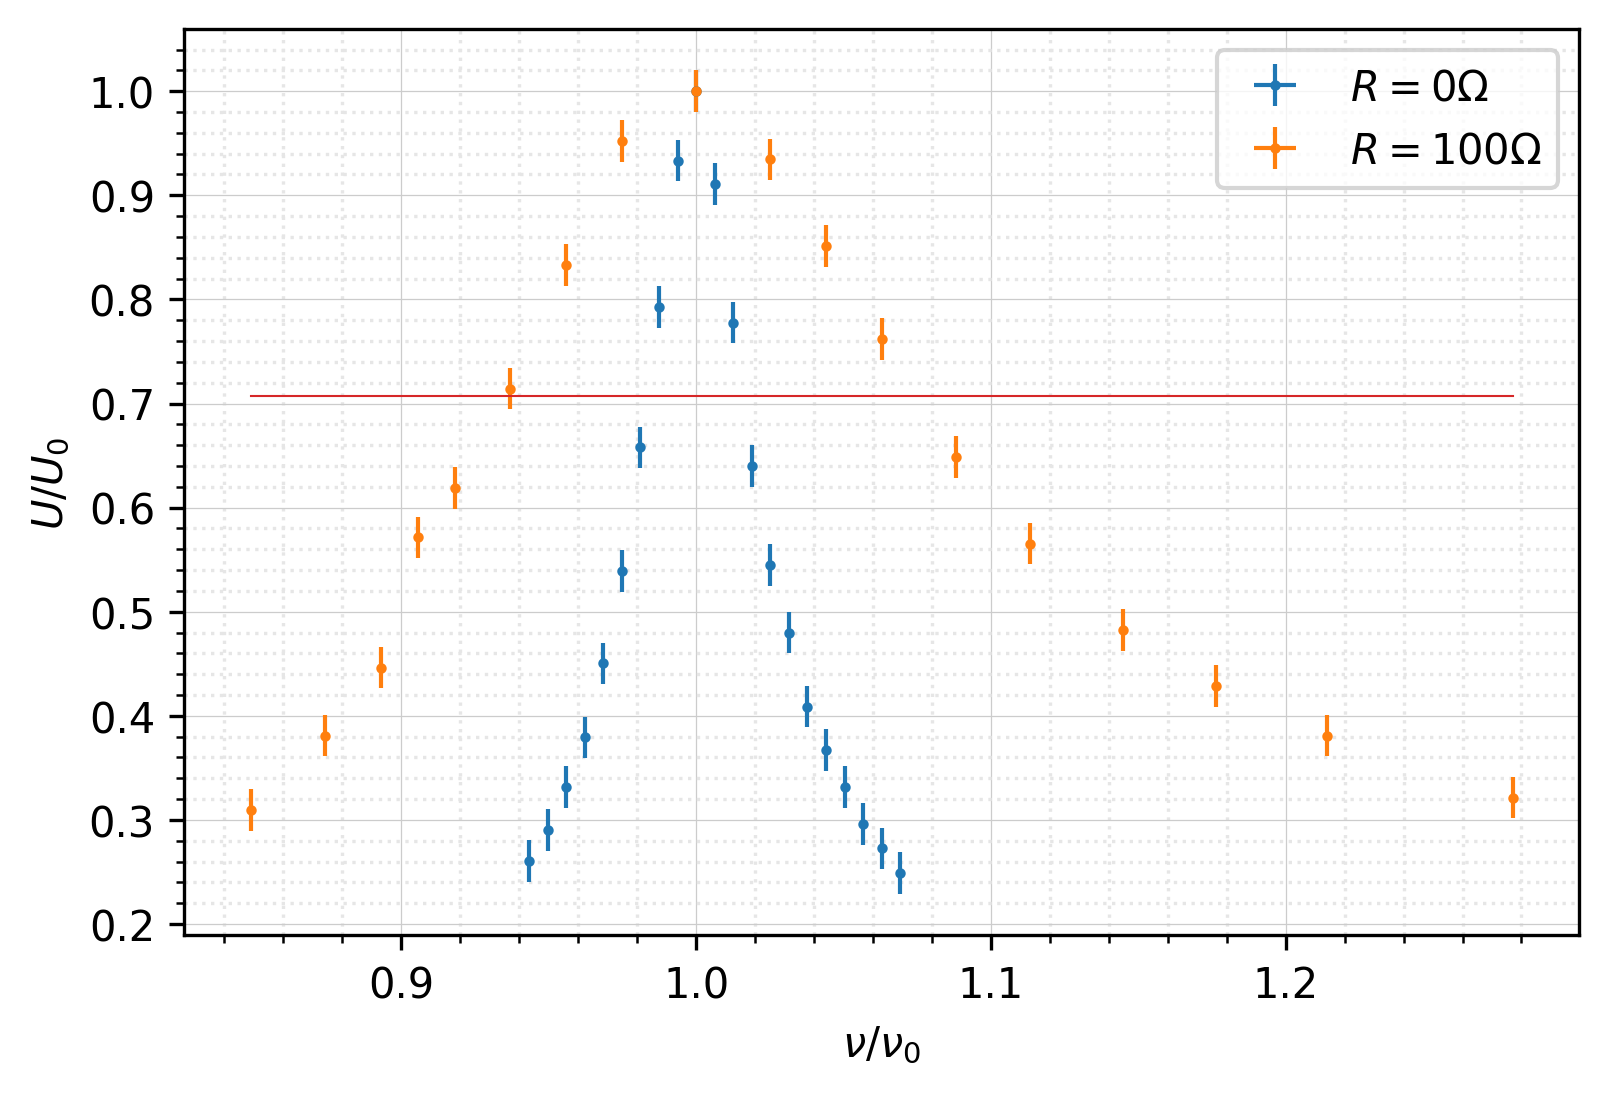

In [563]:
plt.figure(figsize=(6, 4), dpi=300)

plt.minorticks_on()
plt.grid(which='minor', linestyle=':', color='0.9')
plt.grid(which='major', linestyle='-', color='0.8', lw=0.3)

for nominal in nominals:
    df = pd.read_csv(rf'raw-data/U-on-nu_{nominal}Ohm.csv')
    
    U0 = df['U[mV]'][0]
    nu0 = df['nu[Hz]'][0]
    df.sort_values('nu[Hz]', inplace=True)
    
    U = df['U[mV]']
    nu = df['nu[Hz]']
    
    plt.errorbar(nu / nu0, U / U0, yerr=0.02, xerr=0.001, lw=1, ls='', marker='.', markersize=3, label=rf"$R = {nominal} \Omega$", ds='default')
    # plt.plot(U_line, line(U_line, opt[0], opt[1]), label=r"Fitting: $R_{diff}=$ " + f"{-1/opt[0]:.1f}" + r"$\pm 1.48$ kOhm", color="tab:red", linestyle='-')
    
plt.plot([nu.min() / nu0, nu.max() / nu0], 1/sqrt(2)*np.ones(2), lw=0.5, color='tab:red')
    
plt.xlabel(r"$\nu / \nu_0$")
plt.ylabel(r"$U / U_0$")

plt.legend()
plt.savefig(rf"images\U-on-nu_{nominal}-Ohm.png", facecolor="white")
plt.show()

### Добротность контура

$Q = \omega_0 / (2 \Updelta \Omega)$

#### 0 Ом

Измерено с помощью графика

In [564]:
delta = 19/12 * 0.02
1/ delta

31.57894736842106

Измерено с помощью декремента затухания

In [565]:
Q_0_up   = pi / Theta_0_up
Q_0_down = pi / Theta_0_down

In [566]:
Q_0_up

27.544114281648127

In [567]:
Q_0_down

33.31527433170166

Теоретическое значение через параметры контура

In [568]:
Q_0_theor = 1/30.42 * sqrt(L/C)

In [569]:
Q_0_theor

32.88954224399937

#### 100 Ом

Измерено с помощью графика

In [570]:
delta = 0.02*(3/4 + 6 + 1/5)
1 / delta

7.194244604316546

Измерено с помощью декремента затухания

In [571]:
Q_100_up   = pi / Theta_100_up
Q_100_down = pi / Theta_100_down

In [572]:
Q_100_up

7.464127136906649

In [573]:
Q_100_down

10.729236997993604

Теоретическое значение через параметры контура

In [9]:
Q_100_theor = 1/R_100 * sqrt(L/C)

In [10]:
Q_100_theor

7.670309841169453

### Результат

| $R$ Ом | $R_\text{конт}$ | Рез. кривая | Возрастание | Затухание | $f(LCR)$ |
|--------|-----------------|-------------|-------------|-----------|----------|
| 0      | 30.45           | 31.58       | 27.54       | 33.32     | 32.89    |
| 100    | 130.44          | 7.19        | 7.46        | 10.73     | 7.67     |

In [222]:
from scipy.integrate import solve_ivp

pi = np.pi
sqrt = np.sqrt
cos = np.cos
sin = np.sin

In [243]:
eps_0 = 10
R = 100
L = 100e-3
C = 0.1e-6
omega = 2 * pi * 1588
omega_0 = 1 / sqrt(L * C)
phi_0 = -pi/2
gamma = R/(2 * L)

t = np.linspace(-1e-3, 1e-3, 2000)

In [244]:
def deriv_y(t, y):
    u, udot = y
    return [udot, omega_0**2 * eps_0 * cos(omega * t + phi_0) - 2 * gamma * udot - omega_0**2 * u]

yinit = [0, 0]
y = solve_ivp(deriv_y, [-1e-3, 1e-3], yinit)

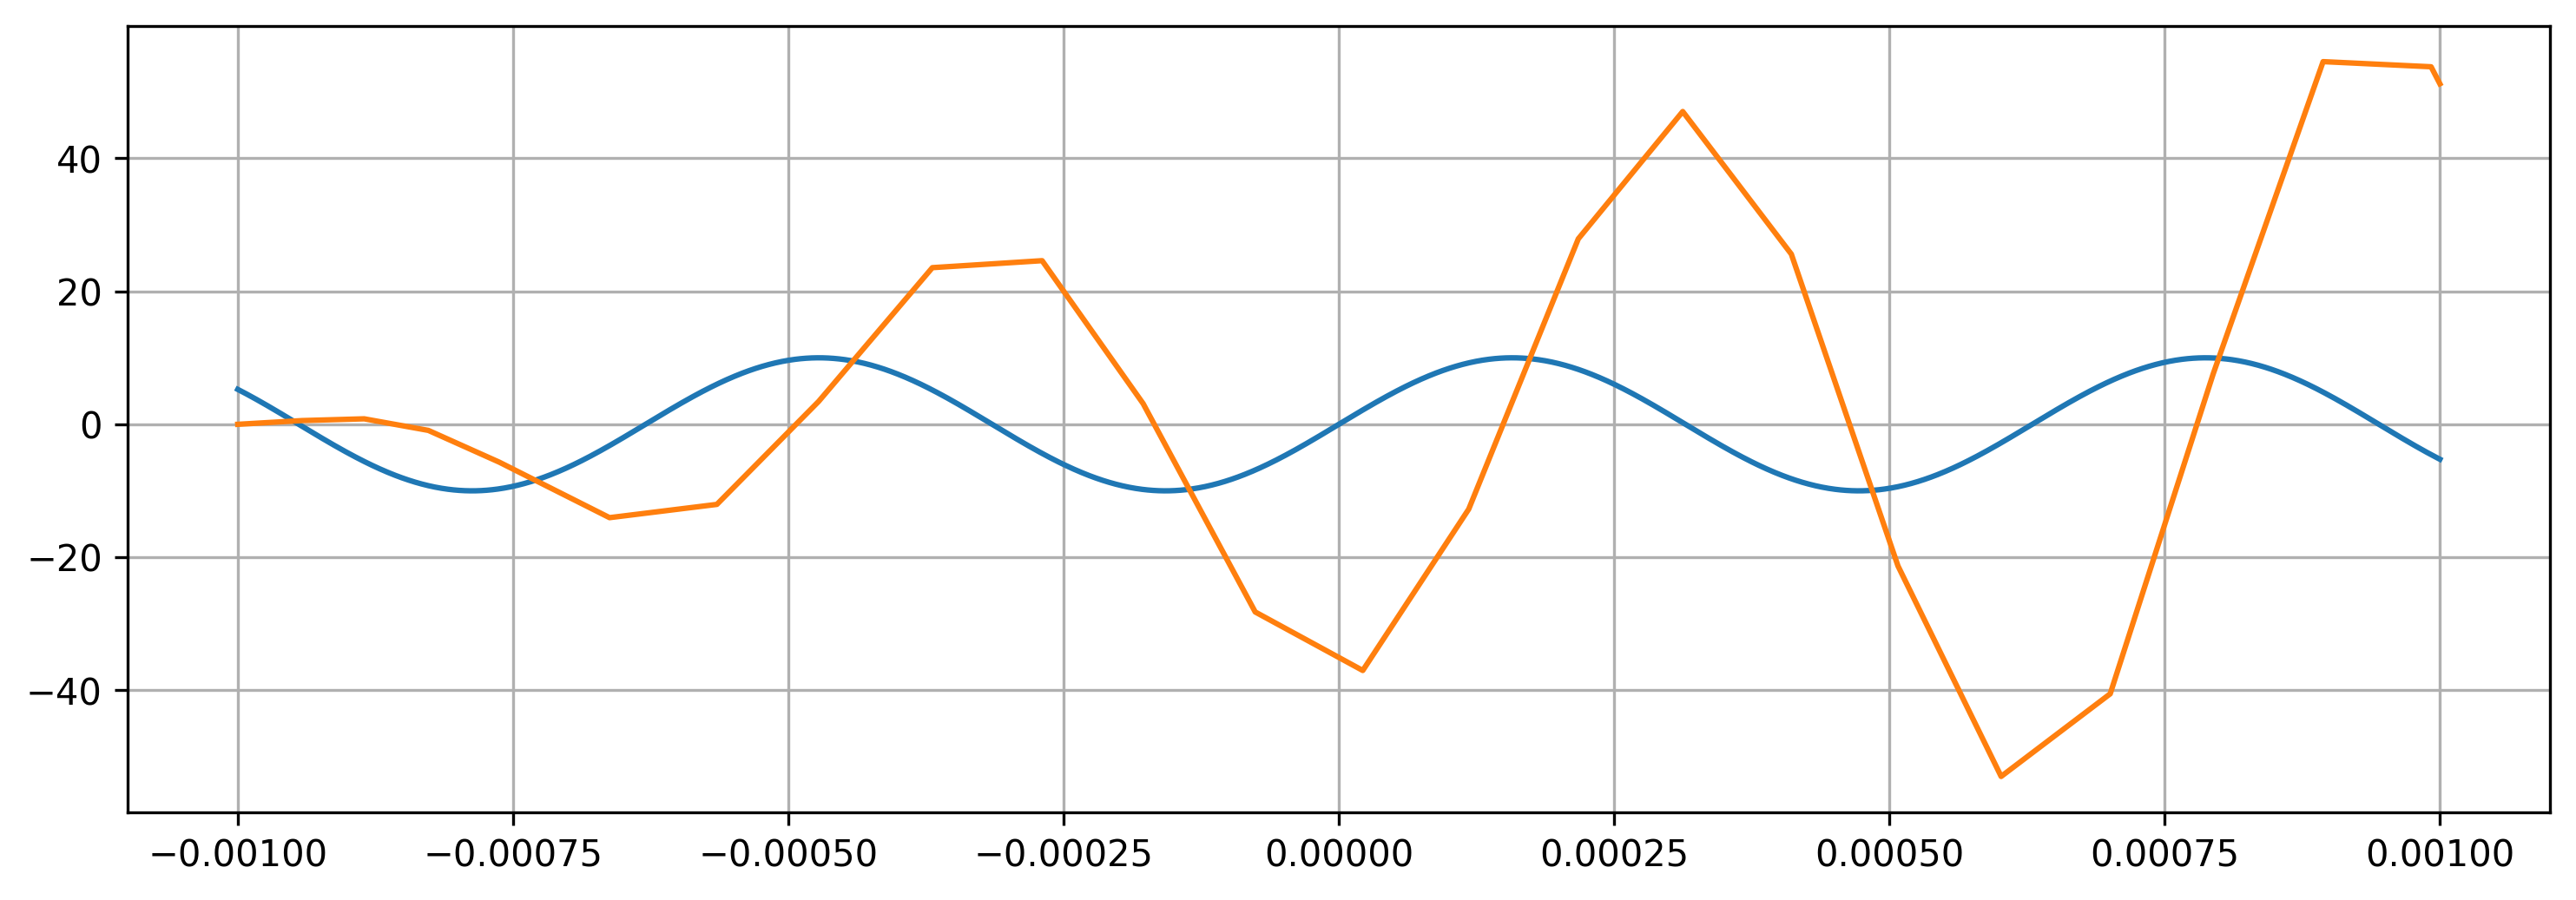

In [245]:
plt.figure(figsize=(12, 4), dpi=300)
plt.grid()
plt.plot(t, 10 * cos(omega * t + phi_0))
plt.plot(y.t, y.y[0])